# Balance of payments

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Balance of Payments.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243,NaN,"International Monetary Fund (IMF), Washington,..."
1,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2018,Balance of Payments: Current account (millions...,-3897,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,2019,Balance of Payments: Current account (millions...,-3792,NaN,"International Monetary Fund (IMF), Washington,..."
...,...,...,...,...,...,...,...
3140,98,Euro Area,2010,Balance of Payments: Financial account (millio...,-24180,NaN,"International Monetary Fund (IMF), Washington,..."
3141,98,Euro Area,2015,Balance of Payments: Financial account (millio...,309129,NaN,"International Monetary Fund (IMF), Washington,..."
3142,98,Euro Area,2018,Balance of Payments: Financial account (millio...,362183,NaN,"International Monetary Fund (IMF), Washington,..."
3143,98,Euro Area,2019,Balance of Payments: Financial account (millio...,229370,NaN,"International Monetary Fund (IMF), Washington,..."


In [5]:
df.shape

(3145, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  3145 non-null   int64 
 1   Unnamed: 1           3145 non-null   object
 2   Year                 3145 non-null   int64 
 3   Series               3145 non-null   object
 4   Value                3145 non-null   int64 
 5   Footnotes            19 non-null     object
 6   Source               3145 non-null   object
dtypes: int64(3), object(4)
memory usage: 172.1+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Country/Area',
                   }, inplace=True)

df.head()

,Code,Country/Area,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243,NaN,"International Monetary Fund (IMF), Washington,..."
1,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578,NaN,"International Monetary Fund (IMF), Washington,..."
2,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193,NaN,"International Monetary Fund (IMF), Washington,..."
3,4,Afghanistan,2018,Balance of Payments: Current account (millions...,-3897,NaN,"International Monetary Fund (IMF), Washington,..."
4,4,Afghanistan,2019,Balance of Payments: Current account (millions...,-3792,NaN,"International Monetary Fund (IMF), Washington,..."


In [8]:
df['Code'] = df['Code'].astype('category')

In [9]:
df1 = df[['Code', 'Country/Area', 'Year', 'Series', 'Value']]
df1

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243
1,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578
2,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193
3,4,Afghanistan,2018,Balance of Payments: Current account (millions...,-3897
4,4,Afghanistan,2019,Balance of Payments: Current account (millions...,-3792
...,...,...,...,...,...
3140,98,Euro Area,2010,Balance of Payments: Financial account (millio...,-24180
3141,98,Euro Area,2015,Balance of Payments: Financial account (millio...,309129
3142,98,Euro Area,2018,Balance of Payments: Financial account (millio...,362183
3143,98,Euro Area,2019,Balance of Payments: Financial account (millio...,229370


In [10]:
df1.shape

(3145, 5)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Code          3145 non-null   category
 1   Country/Area  3145 non-null   object  
 2   Year          3145 non-null   int64   
 3   Series        3145 non-null   object  
 4   Value         3145 non-null   int64   
dtypes: category(1), int64(2), object(2)
memory usage: 114.2+ KB


In [12]:
df1.describe(include='object')

,Country/Area,Series
count,3145,3145
unique,202,3
top,Portugal,Balance of Payments: Current account (millions...
freq,21,1118


In [13]:
df1['Country/Area'].value_counts()

Portugal                       21
Turkey                         21
South Africa                   21
Romania                        21
Spain                          21
                               ..
Micronesia (Fed. States of)     3
Central African Republic        2
Eritrea                         2
Chad                            2
Faroe Islands                   1
Name: Country/Area, Length: 202, dtype: int64

In [14]:
df1['Series'].value_counts()

Balance of Payments: Current account (millions of US dollars)      1118
Balance of Payments: Financial account (millions of US dollars)    1117
Balance of Payments: Capital account (millions of US dollars)       910
Name: Series, dtype: int64

In [15]:
df1['Code'].value_counts().head()

276    21
558    21
586    21
764    21
690    21
Name: Code, dtype: int64

In [16]:
df1['Value'].describe()

count      3145.000000
mean        962.530684
std       40904.461711
min     -743572.000000
25%        -827.000000
50%         -13.000000
75%         242.000000
max      405414.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

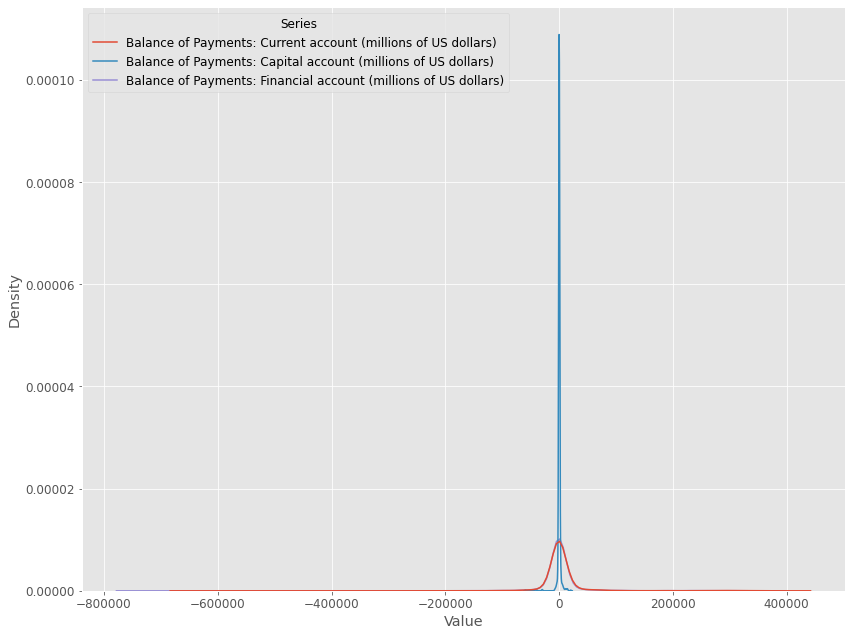

In [17]:
sns.kdeplot(data=df1, x='Value', hue='Series')

# Data Cleaning

In [18]:
df1['Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d’Ivoire",
    'Cura�ao': 'Curaçao'}, inplace=True)

df1['Country/Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Curaçao',
       'Cyprus', 'Czechia', 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Fi

# Missing Values Exploration

In [19]:
df1.isna().sum()

Code            0
Country/Area    0
Year            0
Series          0
Value           0
dtype: int64

# Grouping and Aggregation

In [20]:
country_or_area_grpd = df1.groupby('Country/Area')
country_or_area_grpd.head()

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,1985,Balance of Payments: Current account (millions...,-243
1,4,Afghanistan,2010,Balance of Payments: Current account (millions...,-578
2,4,Afghanistan,2015,Balance of Payments: Current account (millions...,-4193
3,4,Afghanistan,2018,Balance of Payments: Current account (millions...,-3897
4,4,Afghanistan,2019,Balance of Payments: Current account (millions...,-3792
...,...,...,...,...,...
3130,98,Euro Area,2010,Balance of Payments: Current account (millions...,-41234
3131,98,Euro Area,2015,Balance of Payments: Current account (millions...,322471
3132,98,Euro Area,2018,Balance of Payments: Current account (millions...,405414
3133,98,Euro Area,2019,Balance of Payments: Current account (millions...,312826


# Data Visualization

In [21]:
# helper function to format y-axis
from matplotlib.ticker import FuncFormatter

def million(x, pos):
    return '%1.1fM' % (x * 1e-3)

format_mill = FuncFormatter(million)

# barplot helper function
def plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, ci=None, formatter=None):
    # initiate matplotlib figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # create barplot
    sns.barplot(
        data=data, 
        x=x, y=y, hue=hue,
        ci=ci, ax=ax)

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine axis
    sns.despine(bottom=True, left=True)

    return plot_bar

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, ci=None, formatter=None)>

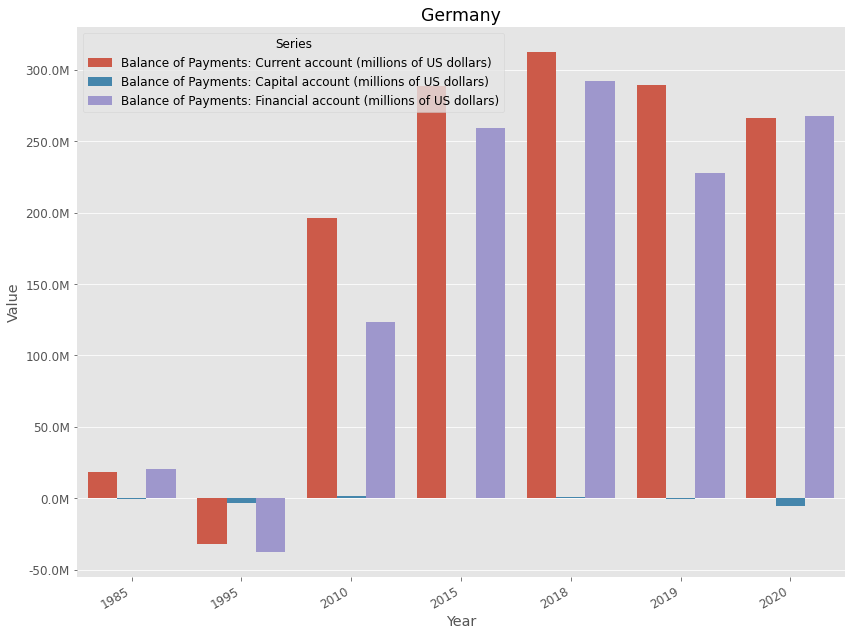

In [22]:
plot_bar(
    data=country_or_area_grpd.get_group('Germany'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Germany',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, ci=None, formatter=None)>

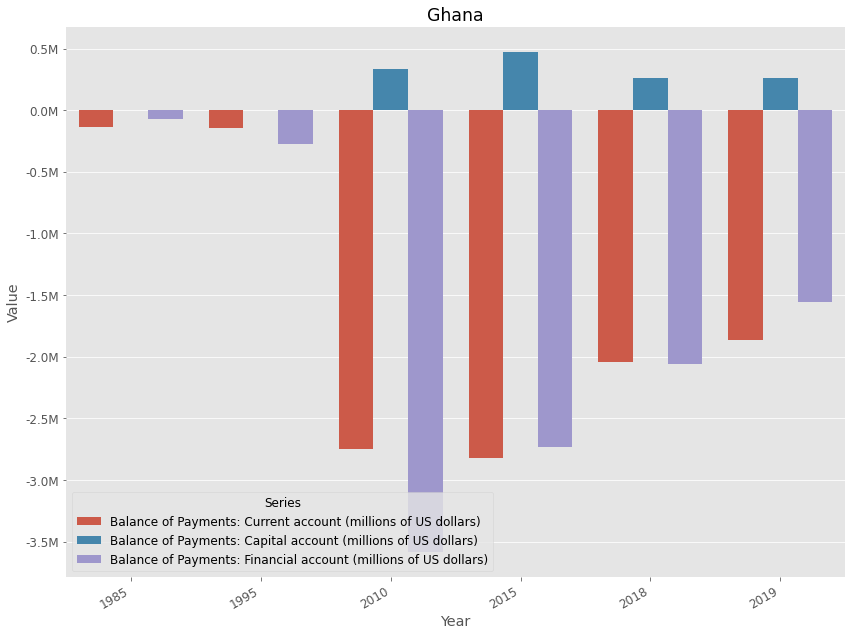

In [23]:
plot_bar(
    data=country_or_area_grpd.get_group('Ghana'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Ghana',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, ci=None, formatter=None)>

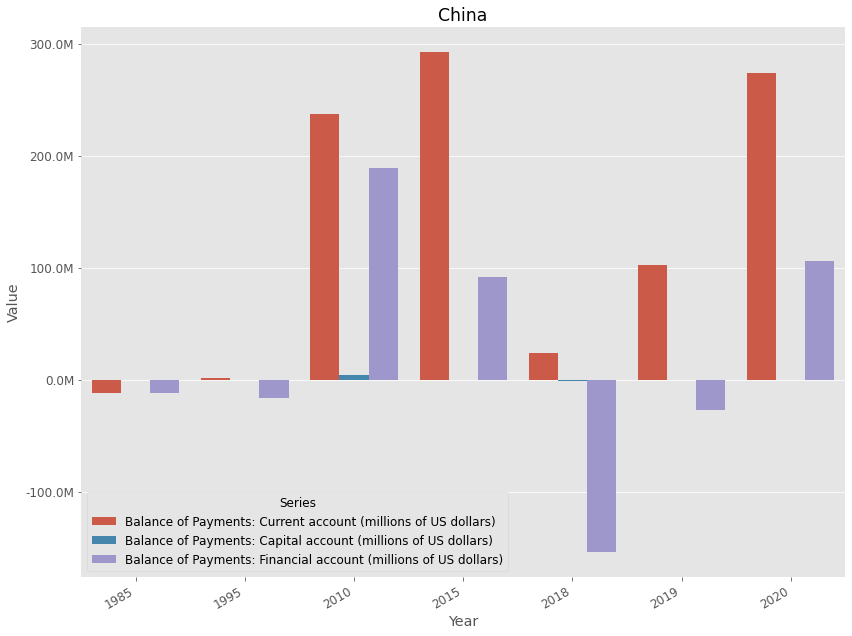

In [24]:
plot_bar(
    data=country_or_area_grpd.get_group('China'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='China',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, ci=None, formatter=None)>

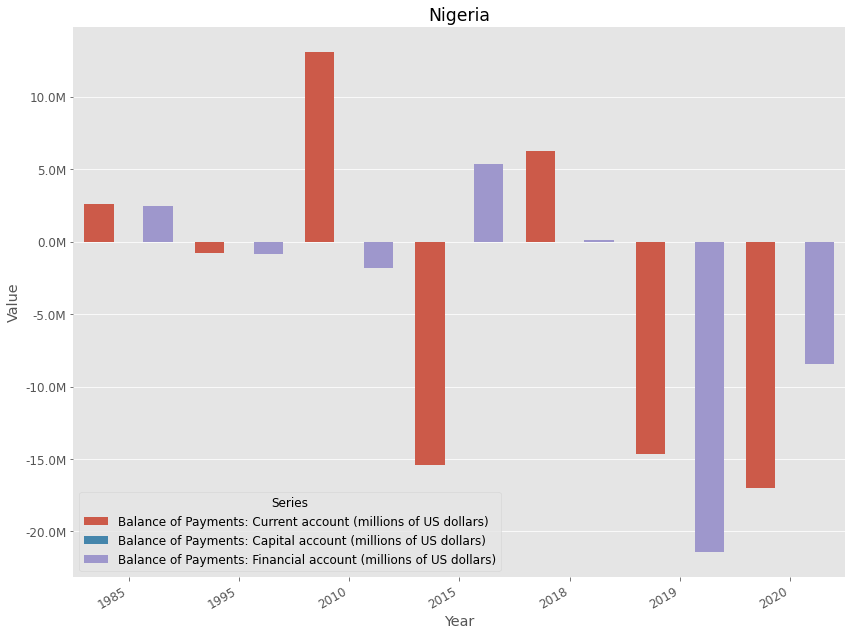

In [25]:
plot_bar(
    data=country_or_area_grpd.get_group('Nigeria'),
    x='Year', y='Value', hue='Series',
    xlabel='Year', ylabel='Value', title='Nigeria',
    formatter=format_mill
)